In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from matplotlib import font_manager
for file in font_manager.findSystemFonts([r'C:\Users\crino\Downloads\Lato']):
    font_manager.fontManager.addfont(path=file)
plt.rcParams['font.family'] = 'Lato'



In [3]:
class datoni:
    
    def __init__(self, name):
        
        self.file_name = f"{name}"
        #self.file_path =f"C:\\Users\crino\Desktop\Thesis_ISI\Simulations\data_simulation\datafile{file_name}.csv"
        self.file_path = f"C:\\Users\\crino\\Desktop\\Thesis_ISI\\Simulations\\data_simulation\\datafile{name}.csv"
        self.datuni = pd.read_csv(self.file_path)
        self.lambdas = self.datuni.iloc[0]
        self.sim_data = self.datuni.iloc[1:]
        self.thresh = self.datuni.iloc[0,6]
        
        
    def media(self):
        #qua devo fare la media
        media = self.sim_data.mean() / 100000
        return media
        
    def varia(self):
        N = 100000
        r_mean = self.media()
        df_sq = (self.sim_data / N) ** 2
        r_mean2 = df_sq.mean()
        r_var_t = np.sqrt(np.abs(r_mean2 - (r_mean ** 2))) / r_mean
        r_var = r_var_t / np.max(r_var_t)
        return r_var

class plottoni:
    
    def __init__(self, pname, color, marker):
        self.pname = f"{pname}"
        self.color = f"{color}"
        self.marker = f"{marker}"
        self.pfile_name = f"{pname}"
        self.pfile_path =f"C:\\Users\crino\Desktop\Thesis_ISI\Simulations\data_simulation\param_{self.pfile_name}.csv"
        self.params = pd.read_csv(self.pfile_path)
        self.p = self.params["p"][0]
        #print(self.p)
        self.w = self.params["w"][0]
        #print(self.w)
        self.datoni = datoni(name = self.pname)
        self.erre = [float(column) for column in self.datoni.datuni.columns]
    
    def plotto(self, *axs):

        axs[0].plot(self.erre, self.datoni.media(), color=self.color, marker=self.marker , alpha=0.7, label=f"$p = {self.p}\, w = {self.w}$")
        axs[0].vlines(1, ymin = 0, ymax = 0.7,  colors = "purple", linestyle = "-.")
        lower_bound, upper_bound = np.percentile(self.datoni.sim_data/100000, [2.5, 97.5], axis = 0)
        axs[0].fill_between(x=self.erre, y1=lower_bound, y2=upper_bound, color=self.color, alpha =0.2, linewidth =0)
        axs[0].scatter(self.erre, self.datoni.media(), color=self.color, marker=self.marker, edgecolors='black', linewidth=0.4)

        axs[0].set_xlabel("$R_0$")
        axs[0].set_ylabel("$r_{\infty}$")
        
        
        axs[1].plot(self.erre, self.datoni.varia(), color=self.color, marker=self.marker , alpha=0.7, label=f"$p = {self.p}\, w = {self.w}$")
        axs[1].vlines(1, ymin = 0, ymax = 1,  colors = "purple", linestyle = "-.", alpha=0.7)
        axs[1].scatter(self.erre, self.datoni.varia(), color=self.color, marker=self.marker, edgecolors='black', linewidth=0.4)
        
        axs[1].set_xlabel("$R_0$")
        axs[1].set_ylabel("$σ_{r_∞}/σ_{max}$")
        
        
        axs[2].plot(self.datoni.lambdas, self.datoni.media(), color=self.color, marker=self.marker , alpha=0.7, label=f"$p = {self.p}\, w = {self.w}$")
        axs[2].vlines(self.datoni.thresh, ymin = 0, ymax = 0.9,  colors = self.color, linestyle = "-.")
        lower_bound, upper_bound = np.percentile(self.datoni.sim_data/100000, [2.5, 97.5], axis = 0)
        axs[2].fill_between(x=self.datoni.lambdas, y1=lower_bound, y2=upper_bound, color=self.color, alpha =0.2, linewidth = 0)
        axs[2].scatter(self.datoni.lambdas, self.datoni.media(), color=self.color, marker=self.marker, edgecolors='black', linewidth=0.4)
        
        axs[2].set_xlabel("$\lambda$")
        axs[2].set_ylabel("$r_{\infty}$")

        
        axs[3].plot(self.datoni.lambdas, self.datoni.varia(), color=self.color, marker=self.marker , alpha=0.7, label=f"$p = {self.p}\, w = {self.w}$")
        axs[3].vlines(self.datoni.thresh, ymin = 0, ymax = 1,  colors = self.color, linestyle = "-.", alpha=0.7)
        axs[3].scatter(self.datoni.lambdas, self.datoni.varia(), color=self.color, marker=self.marker, edgecolors='black', linewidth=0.4)
        
        axs[3].set_xlabel("$\lambda$")
        axs[3].set_ylabel("$σ_{r_∞}/σ_{max}$")
        
        for ax in axs:
            ax.spines["top"].set_visible(False)
            ax.spines["right"].set_visible(False)
            ax.grid(axis="both", linestyle="--", linewidth=0.3)
        

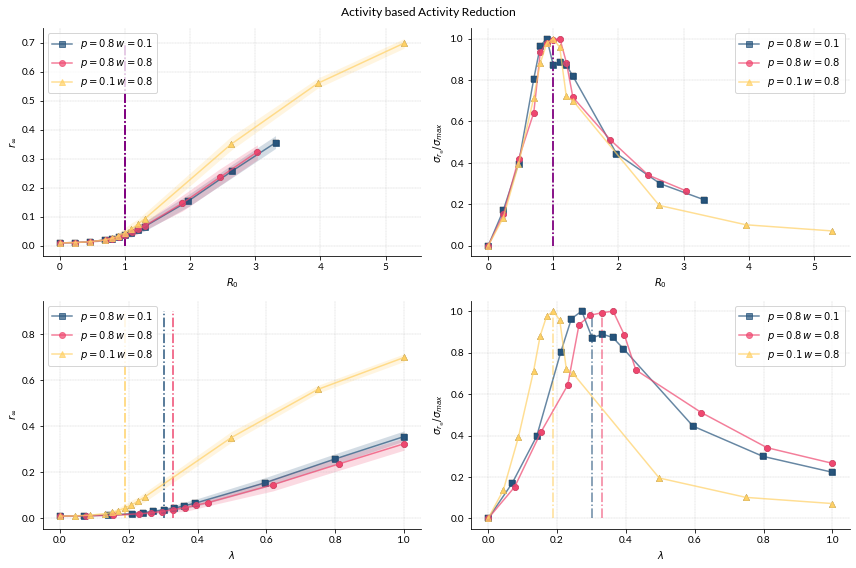

In [4]:
plotton1 = plottoni(pname = "_rnd_act_A1", color = "#ef476f", marker = "o")
plotton2 = plottoni(pname = "_rnd_act_B1", color = "#26547c", marker = "s")
plotton3 = plottoni(pname = "_rnd_act_C1", color = "#ffd166", marker = "^")
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

#print(plotton1.datoni.media())
#print(plotton2.datoni.media())
plotton2.plotto(*axs.flatten())
plotton1.plotto(*axs.flatten())
plotton3.plotto(*axs.flatten())

for ax in axs.flatten():
    ax.grid(True)
    ax.legend()
#axs[0][0].set_title("Random Activity Reduction")
fig.suptitle("Activity based Activity Reduction")
plt.tight_layout()

file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\rnd_act_red_plot.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 

plt.show() 

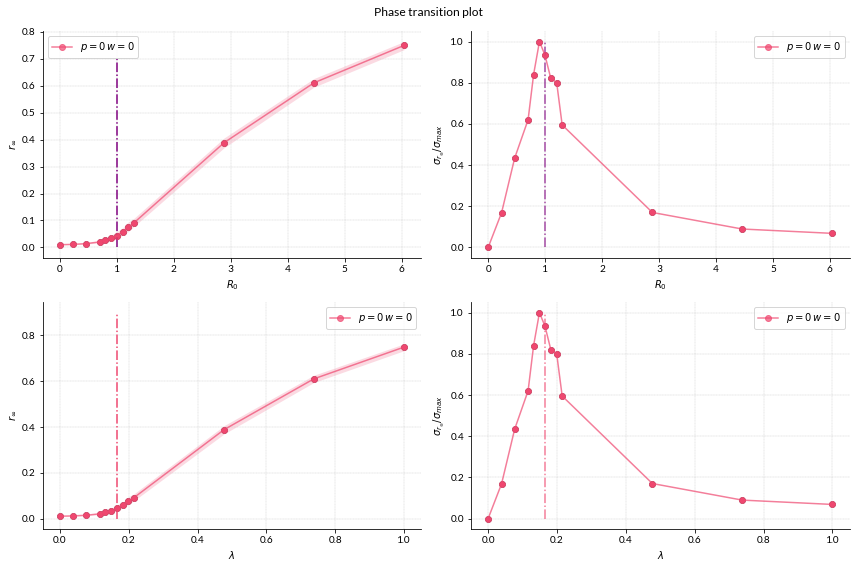

In [5]:
plotton1 = plottoni(pname = "duepuntouno1", color = "#ef476f", marker = "o")
#plotton2 = plottoni(pname = "_rnd_act_B1", color = "#26547c", marker = "s")
#plotton3 = plottoni(pname = "_rnd_act_C1", color = "#ffd166", marker = "^")
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

#print(plotton1.datoni.media())
#print(plotton2.datoni.media())
#plotton2.plotto(*axs.flatten())
plotton1.plotto(*axs.flatten())
#plotton3.plotto(*axs.flatten())

for ax in axs.flatten():
    ax.grid(True)
    ax.legend()
#axs[0][0].set_title("Random Activity Reduction")
fig.suptitle("Phase transition plot")
plt.tight_layout()

file_path = r"C:\Users\crino\Desktop\Thesis_ISI\Simulations\images_plot\no_hi_plot.png"

# Save the figure with specified DPI
plt.savefig(file_path, dpi=300) 

plt.show() 

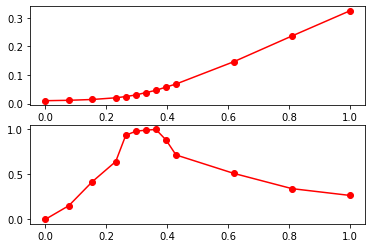

In [56]:
fig, axs = plt.subplots(2)
axs[0].plot(primo.lambdas, primo.media(), color = "r", marker = "o")
axs[1].plot(primo.lambdas, primo.varia(), color = "r", marker = "o")